In [6]:
import micromagneticdata as mdata

import discretisedfield as df

In [3]:
drive = mdata.Data(name='mbp_l_2000_w_100_ht_10_oixxxxxx', dirname='simulations/J_5e+11')[0]

In [7]:
mi = drive.m0
mf = drive[-1]

dx = 20e-9
x0_1 = 1000e-9 - dx
x0_2 = 1000e-9 + dx
m = 2
y0 = 50e-9

def init_m(p):
    x, y, _ = p
    if (y - y0) > m * (x - x0_1):
        return mi(p)
    elif (y - y0) > m * (x - x0_2):
        return (0, 0, 0)
    else:
        return mf(p)

combined = df.Field(oi_close.m0.mesh, nvdim=3, value=init_m)

In [12]:
combined.valid = 'norm'

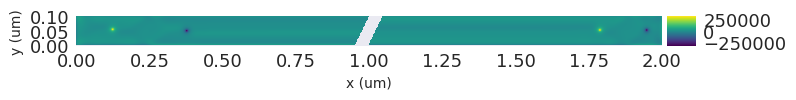

In [13]:
combined.sel(z=1e-9).orientation.z.mpl.scalar(ax=ax, clim=(-1, 1), cmap='coolwarm', multiplier=1e-9, colorbar_label='$m_z$')

In [52]:
combined.to_file('tt-hh-combined.h5')